In [1]:
from model import UNET
from util import *
import tensorflow as tf
import numpy as np

import cv2
import os
import tarfile

In [2]:
dataPath = os.path.join(".","Data","Images")
maskPath = os.path.join(".","Data","Segmentation")
classfilePath = os.path.join(".","Data","binary_class.txt")
dataType = "*.png"

SEED = 42
DATA_SPLIT = 1

OPTIMIZER = "adam"
LOSS = "binary_crossentropy"
METRICS = ["accuracy"]
BATCH_SIZE = 16
IMAGE_SHAPE = (512,512,1)
KFOLD  = 3 #MUST BE >=2
EPOCHS = 250

In [3]:
if not os.path.isdir(dataPath) or not os.path.isdir(maskPath):
    #untar the data if it hasnt been
    print("UNZIPPING DATA")
    with tarfile.open(os.path.join(".","Data","data.tar.gz")) as file:
        file.extractall(os.path.join(".","Data"))


# Folds = 3


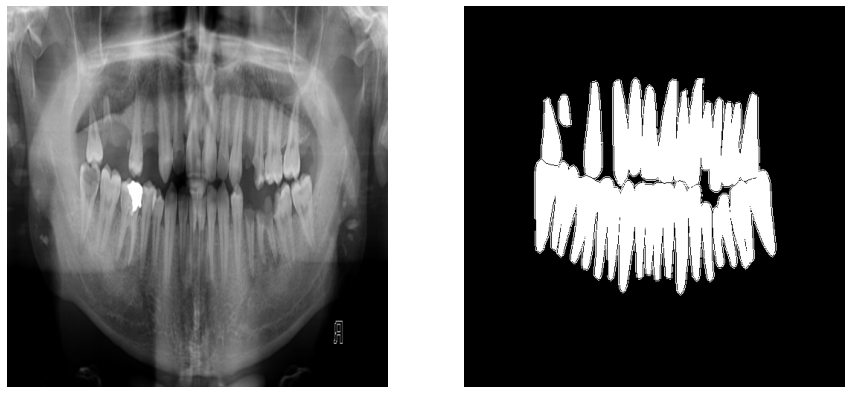

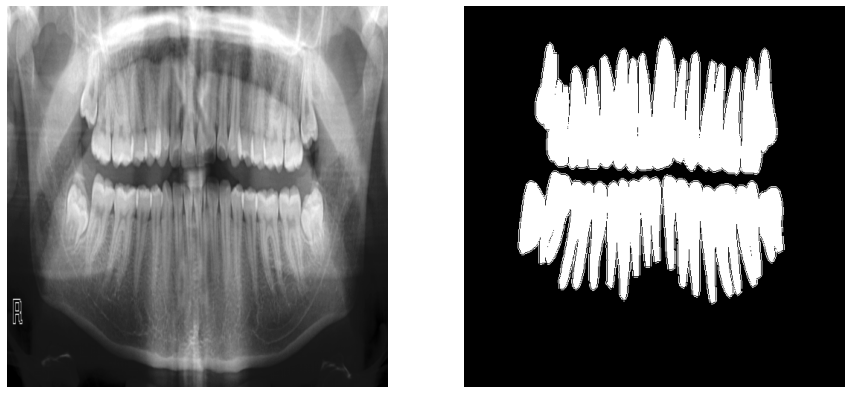

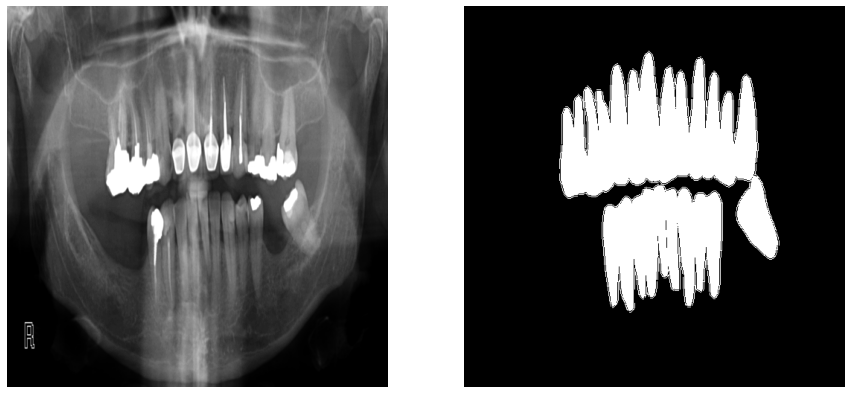

In [37]:
# LOAD DATASET AS TF DATASET
dataset,class_dict = generate_dataset(dataPath, dataType, seed=SEED, img_shape = IMAGE_SHAPE, batch_size = BATCH_SIZE,
                          kfold = KFOLD, repeat_count = 1,class_file = classfilePath,
                                     enable_augmentation=(1,1,0,0,0,0))
print("# Folds = {}".format(len(dataset)))
for element in dataset[0].take(1): #take a batch
    for b in range(min(3,BATCH_SIZE)): #now have a tuple
        display_mask_image([element[0][b],element[1][b]])


In [5]:
histories = []
for k in range(KFOLD):
    print("Doing k-fold {} of {}".format(k+1,KFOLD))
    test_dataset = dataset[k]
    train_datasets = []
    for k2 in range(KFOLD):
        if k2 == k:
            continue
        train_datasets.append(dataset[k2])
    train_dataset = train_datasets[0]
    for ds in train_datasets[1:]:
        train_dataset = train_dataset.concatenate(ds)
    
    model = UNET(input_shape = IMAGE_SHAPE)
    model.compile(optimizer = OPTIMIZER, loss = LOSS, metrics = METRICS)
    history = model.fit(train_dataset, validation_data = test_dataset, \
                            epochs = EPOCHS, verbose = 1)
    histories.append(history.history)
    model.save_weights("single_class_{}/single{}".format(k,k))

history  = {}
history["loss"] = np.mean([hstry["loss"] for hstry in histories],axis=0)
history["accuracy"] = np.mean([hstry["accuracy"] for hstry in histories],axis=0)
history["val_loss"] = np.mean([hstry["val_loss"] for hstry in histories],axis=0)
history["val_accuracy"] = np.mean([hstry["val_accuracy"] for hstry in histories],axis=0)

Doing k-fold 1 of 3
sigmoid
Epoch 1/250


2022-04-13 07:33:00.810570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - ETA: 0s - loss: 0.5023 - accuracy: 0.7628

2022-04-13 07:33:20.395504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 24s 4s/step - loss: 0.5023 - accuracy: 0.7628 - val_loss: 201.9173 - val_accuracy: 0.3047
Epoch 2/250
6/6 [==============================] - 23s 4s/step - loss: 0.2569 - accuracy: 0.9005 - val_loss: 8202.8906 - val_accuracy: 0.2340
Epoch 3/250
6/6 [==============================] - 23s 4s/step - loss: 0.2081 - accuracy: 0.9168 - val_loss: 1799.0433 - val_accuracy: 0.2342
Epoch 4/250
6/6 [==============================] - 23s 4s/step - loss: 0.1746 - accuracy: 0.9273 - val_loss: 647.0305 - val_accuracy: 0.2605
Epoch 5/250
6/6 [==============================] - 23s 4s/step - loss: 0.1696 - accuracy: 0.9297 - val_loss: 202.5080 - val_accuracy: 0.2688
Epoch 6/250
6/6 [==============================] - 23s 4s/step - loss: 0.1660 - accuracy: 0.9329 - val_loss: 58.2960 - val_accuracy: 0.2951
Epoch 7/250
6/6 [==============================] - 23s 4s/step - loss: 0.1512 - accuracy: 0.9381 - val_loss: 89.3630 - val_accuracy: 0.2677
Epoch 8/250
6/6 [========

6/6 [==============================] - 25s 4s/step - loss: 0.0890 - accuracy: 0.9615 - val_loss: 0.0848 - val_accuracy: 0.9628
Epoch 60/250
6/6 [==============================] - 25s 4s/step - loss: 0.0820 - accuracy: 0.9639 - val_loss: 0.0929 - val_accuracy: 0.9584
Epoch 61/250
6/6 [==============================] - 25s 4s/step - loss: 0.0851 - accuracy: 0.9620 - val_loss: 0.0889 - val_accuracy: 0.9600
Epoch 62/250
6/6 [==============================] - 25s 4s/step - loss: 0.0802 - accuracy: 0.9645 - val_loss: 0.0932 - val_accuracy: 0.9595
Epoch 63/250
6/6 [==============================] - 25s 4s/step - loss: 0.0796 - accuracy: 0.9648 - val_loss: 0.0884 - val_accuracy: 0.9611
Epoch 64/250
6/6 [==============================] - 25s 4s/step - loss: 0.0811 - accuracy: 0.9641 - val_loss: 0.0938 - val_accuracy: 0.9596
Epoch 65/250
6/6 [==============================] - 25s 4s/step - loss: 0.0749 - accuracy: 0.9667 - val_loss: 0.0893 - val_accuracy: 0.9602
Epoch 66/250
6/6 [===============

6/6 [==============================] - 25s 4s/step - loss: 0.0621 - accuracy: 0.9709 - val_loss: 0.0664 - val_accuracy: 0.9696
Epoch 118/250
6/6 [==============================] - 25s 4s/step - loss: 0.0602 - accuracy: 0.9717 - val_loss: 0.0645 - val_accuracy: 0.9703
Epoch 119/250
6/6 [==============================] - 25s 4s/step - loss: 0.0673 - accuracy: 0.9690 - val_loss: 0.0707 - val_accuracy: 0.9673
Epoch 120/250
6/6 [==============================] - 25s 4s/step - loss: 0.0673 - accuracy: 0.9675 - val_loss: 0.0645 - val_accuracy: 0.9704
Epoch 121/250
6/6 [==============================] - 25s 4s/step - loss: 0.0650 - accuracy: 0.9693 - val_loss: 0.0619 - val_accuracy: 0.9710
Epoch 122/250
6/6 [==============================] - 25s 4s/step - loss: 0.0632 - accuracy: 0.9700 - val_loss: 0.0693 - val_accuracy: 0.9677
Epoch 123/250
6/6 [==============================] - 25s 4s/step - loss: 0.0645 - accuracy: 0.9685 - val_loss: 0.0625 - val_accuracy: 0.9712
Epoch 124/250
6/6 [========

6/6 [==============================] - 23s 4s/step - loss: 0.0501 - accuracy: 0.9744 - val_loss: 0.0515 - val_accuracy: 0.9742
Epoch 176/250
6/6 [==============================] - 23s 4s/step - loss: 0.0590 - accuracy: 0.9697 - val_loss: 0.0548 - val_accuracy: 0.9712
Epoch 177/250
6/6 [==============================] - 23s 4s/step - loss: 0.0493 - accuracy: 0.9748 - val_loss: 0.0547 - val_accuracy: 0.9716
Epoch 178/250
6/6 [==============================] - 23s 4s/step - loss: 0.0477 - accuracy: 0.9755 - val_loss: 0.0509 - val_accuracy: 0.9744
Epoch 179/250
6/6 [==============================] - 23s 4s/step - loss: 0.0542 - accuracy: 0.9723 - val_loss: 0.0482 - val_accuracy: 0.9755
Epoch 180/250
6/6 [==============================] - 23s 4s/step - loss: 0.0531 - accuracy: 0.9725 - val_loss: 0.0533 - val_accuracy: 0.9733
Epoch 181/250
6/6 [==============================] - 23s 4s/step - loss: 0.0541 - accuracy: 0.9718 - val_loss: 0.0542 - val_accuracy: 0.9717
Epoch 182/250
6/6 [========

6/6 [==============================] - 23s 4s/step - loss: 0.0430 - accuracy: 0.9784 - val_loss: 0.0416 - val_accuracy: 0.9793
Epoch 234/250
6/6 [==============================] - 23s 4s/step - loss: 0.0413 - accuracy: 0.9796 - val_loss: 0.0462 - val_accuracy: 0.9771
Epoch 235/250
6/6 [==============================] - 23s 4s/step - loss: 0.0426 - accuracy: 0.9789 - val_loss: 0.0437 - val_accuracy: 0.9780
Epoch 236/250
6/6 [==============================] - 23s 4s/step - loss: 0.0450 - accuracy: 0.9776 - val_loss: 0.0546 - val_accuracy: 0.9728
Epoch 237/250
6/6 [==============================] - 23s 4s/step - loss: 0.0438 - accuracy: 0.9782 - val_loss: 0.0497 - val_accuracy: 0.9754
Epoch 238/250
6/6 [==============================] - 23s 4s/step - loss: 0.0449 - accuracy: 0.9777 - val_loss: 0.0486 - val_accuracy: 0.9755
Epoch 239/250
6/6 [==============================] - 23s 4s/step - loss: 0.0411 - accuracy: 0.9797 - val_loss: 0.0496 - val_accuracy: 0.9750
Epoch 240/250
6/6 [========

2022-04-13 09:11:35.170840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - ETA: 0s - loss: 0.5188 - accuracy: 0.7622

2022-04-13 09:11:54.509220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 23s 4s/step - loss: 0.5188 - accuracy: 0.7622 - val_loss: 621.1494 - val_accuracy: 0.2554
Epoch 2/250
6/6 [==============================] - 23s 4s/step - loss: 0.2552 - accuracy: 0.8992 - val_loss: 5543.7896 - val_accuracy: 0.2464
Epoch 3/250
6/6 [==============================] - 23s 4s/step - loss: 0.2052 - accuracy: 0.9175 - val_loss: 716.9988 - val_accuracy: 0.2774
Epoch 4/250
6/6 [==============================] - 23s 4s/step - loss: 0.1689 - accuracy: 0.9297 - val_loss: 290.8223 - val_accuracy: 0.2825
Epoch 5/250
6/6 [==============================] - 23s 4s/step - loss: 0.1556 - accuracy: 0.9357 - val_loss: 208.9585 - val_accuracy: 0.2916
Epoch 6/250
6/6 [==============================] - 23s 4s/step - loss: 0.1584 - accuracy: 0.9348 - val_loss: 44.4841 - val_accuracy: 0.3508
Epoch 7/250
6/6 [==============================] - 23s 4s/step - loss: 0.1427 - accuracy: 0.9404 - val_loss: 4.9573 - val_accuracy: 0.6019
Epoch 8/250
6/6 [==========

6/6 [==============================] - 23s 4s/step - loss: 0.0806 - accuracy: 0.9641 - val_loss: 0.0945 - val_accuracy: 0.9599
Epoch 60/250
6/6 [==============================] - 23s 4s/step - loss: 0.0799 - accuracy: 0.9638 - val_loss: 0.0802 - val_accuracy: 0.9645
Epoch 61/250
6/6 [==============================] - 23s 4s/step - loss: 0.0786 - accuracy: 0.9660 - val_loss: 0.1234 - val_accuracy: 0.9480
Epoch 62/250
6/6 [==============================] - 23s 4s/step - loss: 0.0732 - accuracy: 0.9677 - val_loss: 0.1232 - val_accuracy: 0.9537
Epoch 63/250
6/6 [==============================] - 23s 4s/step - loss: 0.0747 - accuracy: 0.9670 - val_loss: 0.1189 - val_accuracy: 0.9565
Epoch 64/250
6/6 [==============================] - 23s 4s/step - loss: 0.0745 - accuracy: 0.9666 - val_loss: 0.0933 - val_accuracy: 0.9600
Epoch 65/250
6/6 [==============================] - 23s 4s/step - loss: 0.0713 - accuracy: 0.9677 - val_loss: 0.0901 - val_accuracy: 0.9622
Epoch 66/250
6/6 [===============

6/6 [==============================] - 23s 4s/step - loss: 0.0562 - accuracy: 0.9727 - val_loss: 0.0650 - val_accuracy: 0.9689
Epoch 118/250
6/6 [==============================] - 23s 4s/step - loss: 0.0589 - accuracy: 0.9710 - val_loss: 0.0578 - val_accuracy: 0.9727
Epoch 119/250
6/6 [==============================] - 23s 4s/step - loss: 0.0551 - accuracy: 0.9729 - val_loss: 0.0808 - val_accuracy: 0.9649
Epoch 120/250
6/6 [==============================] - 23s 4s/step - loss: 0.0537 - accuracy: 0.9733 - val_loss: 0.0634 - val_accuracy: 0.9717
Epoch 121/250
6/6 [==============================] - 23s 4s/step - loss: 0.0572 - accuracy: 0.9715 - val_loss: 0.0569 - val_accuracy: 0.9729
Epoch 122/250
6/6 [==============================] - 23s 4s/step - loss: 0.0523 - accuracy: 0.9739 - val_loss: 0.0597 - val_accuracy: 0.9723
Epoch 123/250
6/6 [==============================] - 23s 4s/step - loss: 0.0565 - accuracy: 0.9717 - val_loss: 0.0748 - val_accuracy: 0.9665
Epoch 124/250
6/6 [========

6/6 [==============================] - 23s 4s/step - loss: 0.0501 - accuracy: 0.9741 - val_loss: 0.0522 - val_accuracy: 0.9733
Epoch 176/250
6/6 [==============================] - 23s 4s/step - loss: 0.0460 - accuracy: 0.9769 - val_loss: 0.0538 - val_accuracy: 0.9726
Epoch 177/250
6/6 [==============================] - 23s 4s/step - loss: 0.0497 - accuracy: 0.9746 - val_loss: 0.0466 - val_accuracy: 0.9767
Epoch 178/250
6/6 [==============================] - 23s 4s/step - loss: 0.0499 - accuracy: 0.9743 - val_loss: 0.0530 - val_accuracy: 0.9731
Epoch 179/250
6/6 [==============================] - 23s 4s/step - loss: 0.0440 - accuracy: 0.9781 - val_loss: 0.0585 - val_accuracy: 0.9701
Epoch 180/250
6/6 [==============================] - 23s 4s/step - loss: 0.0457 - accuracy: 0.9771 - val_loss: 0.0498 - val_accuracy: 0.9740
Epoch 181/250
6/6 [==============================] - 23s 4s/step - loss: 0.0513 - accuracy: 0.9738 - val_loss: 0.0520 - val_accuracy: 0.9727
Epoch 182/250
6/6 [========

6/6 [==============================] - 23s 4s/step - loss: 0.0472 - accuracy: 0.9759 - val_loss: 0.0475 - val_accuracy: 0.9766
Epoch 234/250
6/6 [==============================] - 23s 4s/step - loss: 0.0412 - accuracy: 0.9800 - val_loss: 0.0470 - val_accuracy: 0.9770
Epoch 235/250
6/6 [==============================] - 23s 4s/step - loss: 0.0394 - accuracy: 0.9808 - val_loss: 0.0496 - val_accuracy: 0.9754
Epoch 236/250
6/6 [==============================] - 23s 4s/step - loss: 0.0397 - accuracy: 0.9809 - val_loss: 0.0496 - val_accuracy: 0.9782
Epoch 237/250
6/6 [==============================] - 23s 4s/step - loss: 0.0436 - accuracy: 0.9785 - val_loss: 0.0392 - val_accuracy: 0.9813
Epoch 238/250
6/6 [==============================] - 23s 4s/step - loss: 0.0411 - accuracy: 0.9796 - val_loss: 0.0543 - val_accuracy: 0.9740
Epoch 239/250
6/6 [==============================] - 23s 4s/step - loss: 0.0449 - accuracy: 0.9776 - val_loss: 0.0447 - val_accuracy: 0.9777
Epoch 240/250
6/6 [========

2022-04-13 10:46:40.749736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - ETA: 0s - loss: 0.5396 - accuracy: 0.7154

2022-04-13 10:47:00.357085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 24s 4s/step - loss: 0.5396 - accuracy: 0.7154 - val_loss: 13.1731 - val_accuracy: 0.3954
Epoch 2/250
6/6 [==============================] - 23s 4s/step - loss: 0.2674 - accuracy: 0.8825 - val_loss: 128.3947 - val_accuracy: 0.6591
Epoch 3/250
6/6 [==============================] - 23s 4s/step - loss: 0.1994 - accuracy: 0.9182 - val_loss: 554.3231 - val_accuracy: 0.3360
Epoch 4/250
6/6 [==============================] - 23s 4s/step - loss: 0.1807 - accuracy: 0.9253 - val_loss: 156.0246 - val_accuracy: 0.3526
Epoch 5/250
6/6 [==============================] - 23s 4s/step - loss: 0.1751 - accuracy: 0.9288 - val_loss: 32.3227 - val_accuracy: 0.3735
Epoch 6/250
6/6 [==============================] - 23s 4s/step - loss: 0.1543 - accuracy: 0.9367 - val_loss: 22.3062 - val_accuracy: 0.6755
Epoch 7/250
6/6 [==============================] - 23s 4s/step - loss: 0.1396 - accuracy: 0.9415 - val_loss: 2.5873 - val_accuracy: 0.6128
Epoch 8/250
6/6 [=============

6/6 [==============================] - 23s 4s/step - loss: 0.0787 - accuracy: 0.9653 - val_loss: 0.1023 - val_accuracy: 0.9565
Epoch 60/250
6/6 [==============================] - 23s 4s/step - loss: 0.0823 - accuracy: 0.9645 - val_loss: 0.1073 - val_accuracy: 0.9580
Epoch 61/250
6/6 [==============================] - 23s 4s/step - loss: 0.0762 - accuracy: 0.9660 - val_loss: 0.1126 - val_accuracy: 0.9563
Epoch 62/250
6/6 [==============================] - 23s 4s/step - loss: 0.0765 - accuracy: 0.9657 - val_loss: 0.1458 - val_accuracy: 0.9485
Epoch 63/250
6/6 [==============================] - 23s 4s/step - loss: 0.0772 - accuracy: 0.9655 - val_loss: 0.1190 - val_accuracy: 0.9544
Epoch 64/250
6/6 [==============================] - 23s 4s/step - loss: 0.0731 - accuracy: 0.9667 - val_loss: 0.1049 - val_accuracy: 0.9590
Epoch 65/250
6/6 [==============================] - 23s 4s/step - loss: 0.0761 - accuracy: 0.9656 - val_loss: 0.1008 - val_accuracy: 0.9581
Epoch 66/250
6/6 [===============

6/6 [==============================] - 23s 4s/step - loss: 0.0561 - accuracy: 0.9727 - val_loss: 0.0656 - val_accuracy: 0.9711
Epoch 118/250
6/6 [==============================] - 23s 4s/step - loss: 0.0624 - accuracy: 0.9698 - val_loss: 0.0613 - val_accuracy: 0.9714
Epoch 119/250
6/6 [==============================] - 23s 4s/step - loss: 0.0623 - accuracy: 0.9699 - val_loss: 0.0785 - val_accuracy: 0.9640
Epoch 120/250
6/6 [==============================] - 23s 4s/step - loss: 0.0570 - accuracy: 0.9721 - val_loss: 0.0644 - val_accuracy: 0.9709
Epoch 121/250
6/6 [==============================] - 23s 4s/step - loss: 0.0571 - accuracy: 0.9718 - val_loss: 0.0647 - val_accuracy: 0.9709
Epoch 122/250
6/6 [==============================] - 23s 4s/step - loss: 0.0592 - accuracy: 0.9705 - val_loss: 0.0731 - val_accuracy: 0.9681
Epoch 123/250
6/6 [==============================] - 23s 4s/step - loss: 0.0535 - accuracy: 0.9733 - val_loss: 0.0615 - val_accuracy: 0.9713
Epoch 124/250
6/6 [========

6/6 [==============================] - 23s 4s/step - loss: 0.0436 - accuracy: 0.9778 - val_loss: 0.0421 - val_accuracy: 0.9788
Epoch 176/250
6/6 [==============================] - 23s 4s/step - loss: 0.0473 - accuracy: 0.9756 - val_loss: 0.0470 - val_accuracy: 0.9764
Epoch 177/250
6/6 [==============================] - 23s 4s/step - loss: 0.0461 - accuracy: 0.9762 - val_loss: 0.0456 - val_accuracy: 0.9773
Epoch 178/250
6/6 [==============================] - 23s 4s/step - loss: 0.0443 - accuracy: 0.9777 - val_loss: 0.0465 - val_accuracy: 0.9759
Epoch 179/250
6/6 [==============================] - 23s 4s/step - loss: 0.0454 - accuracy: 0.9767 - val_loss: 0.0497 - val_accuracy: 0.9748
Epoch 180/250
6/6 [==============================] - 23s 4s/step - loss: 0.0477 - accuracy: 0.9757 - val_loss: 0.0425 - val_accuracy: 0.9784
Epoch 181/250
6/6 [==============================] - 23s 4s/step - loss: 0.0457 - accuracy: 0.9763 - val_loss: 0.0442 - val_accuracy: 0.9778
Epoch 182/250
6/6 [========

6/6 [==============================] - 23s 4s/step - loss: 0.0385 - accuracy: 0.9816 - val_loss: 0.0379 - val_accuracy: 0.9813
Epoch 234/250
6/6 [==============================] - 23s 4s/step - loss: 0.0381 - accuracy: 0.9814 - val_loss: 0.0438 - val_accuracy: 0.9782
Epoch 235/250
6/6 [==============================] - 23s 4s/step - loss: 0.0372 - accuracy: 0.9819 - val_loss: 0.0417 - val_accuracy: 0.9801
Epoch 236/250
6/6 [==============================] - 23s 4s/step - loss: 0.0355 - accuracy: 0.9829 - val_loss: 0.0448 - val_accuracy: 0.9777
Epoch 237/250
6/6 [==============================] - 23s 4s/step - loss: 0.0375 - accuracy: 0.9817 - val_loss: 0.0457 - val_accuracy: 0.9778
Epoch 238/250
6/6 [==============================] - 23s 4s/step - loss: 0.0401 - accuracy: 0.9801 - val_loss: 0.0402 - val_accuracy: 0.9805
Epoch 239/250
6/6 [==============================] - 23s 4s/step - loss: 0.0368 - accuracy: 0.9822 - val_loss: 0.0378 - val_accuracy: 0.9819
Epoch 240/250
6/6 [========

In [6]:
model = UNET(input_shape = IMAGE_SHAPE)
model.compile(optimizer = OPTIMIZER, loss = LOSS, metrics = METRICS)
model.load_weights('./single_class_1/single1')

sigmoid


In [16]:
import cv2
clahe = cv2.createCLAHE( clipLimit=5, tileGridSize=(17, 17))

task-13.png


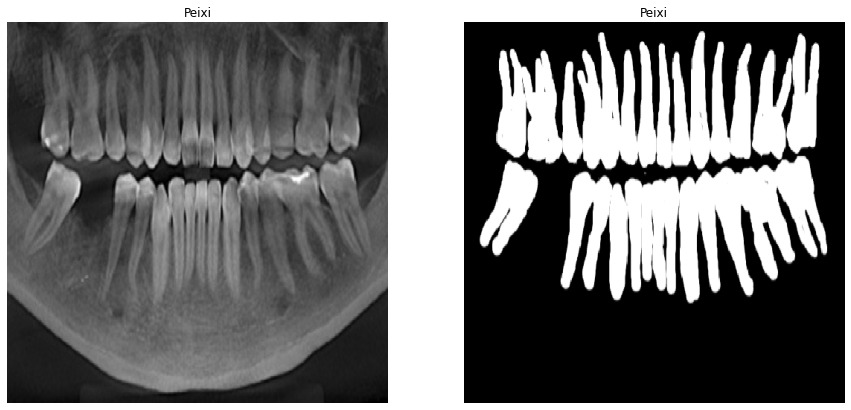

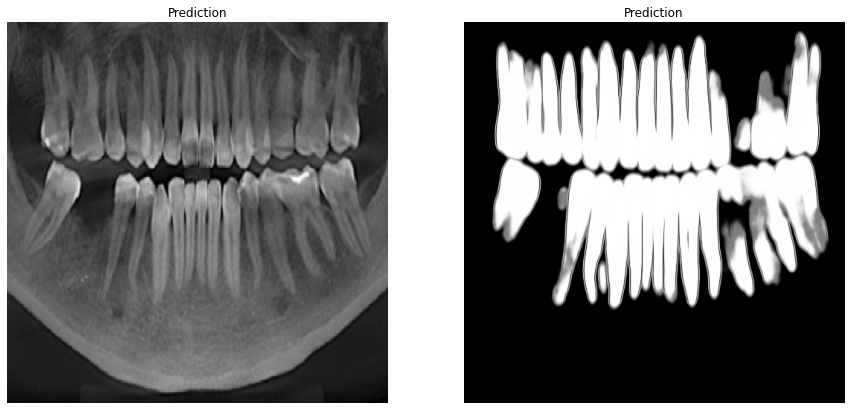

task-14.png


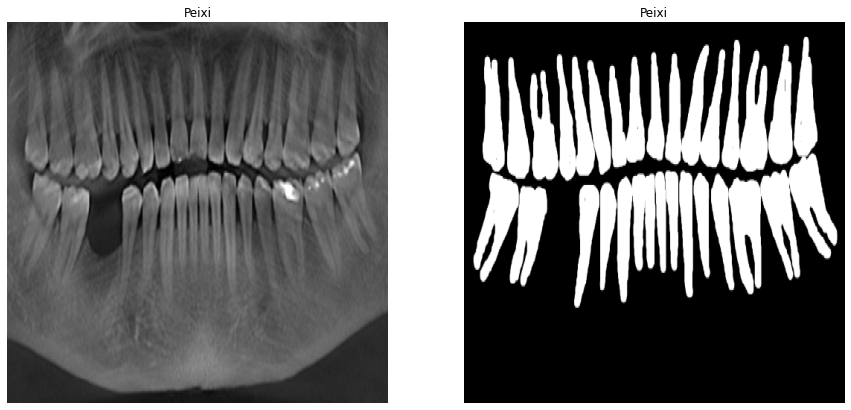

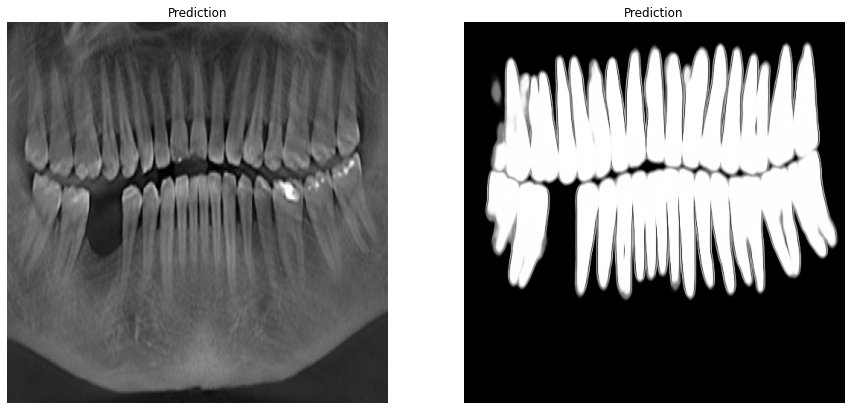

task-15.png


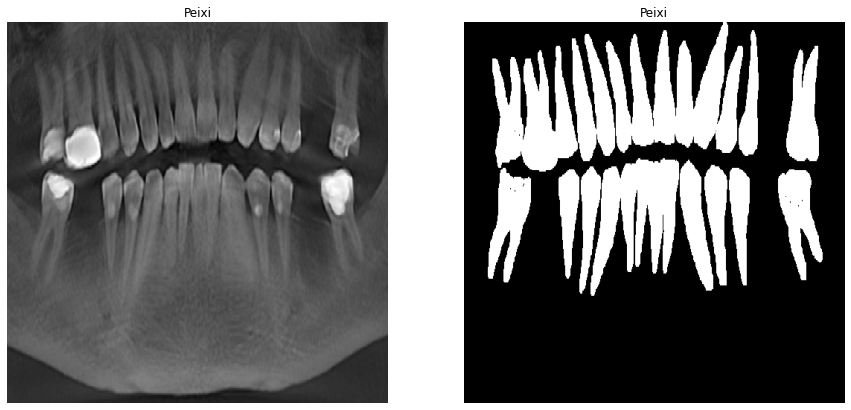

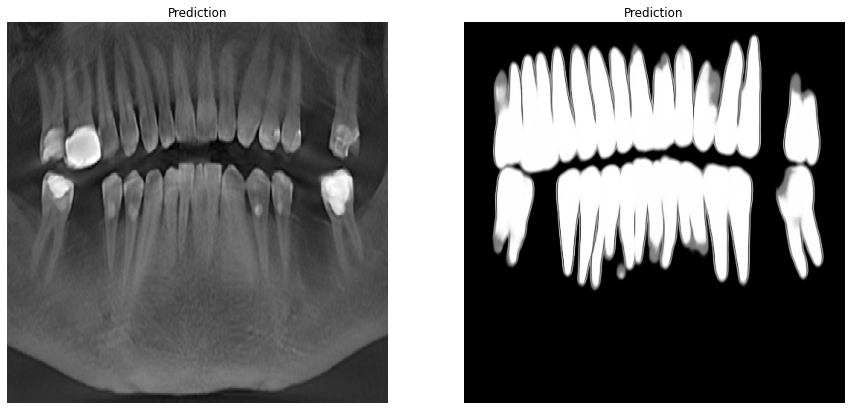

task-16.png


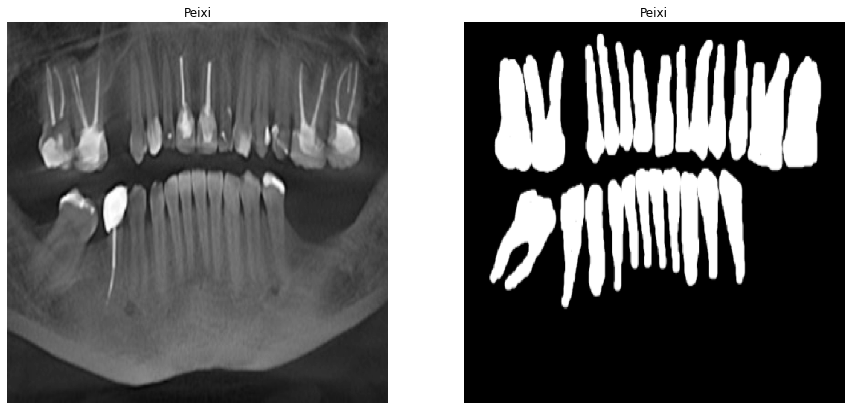

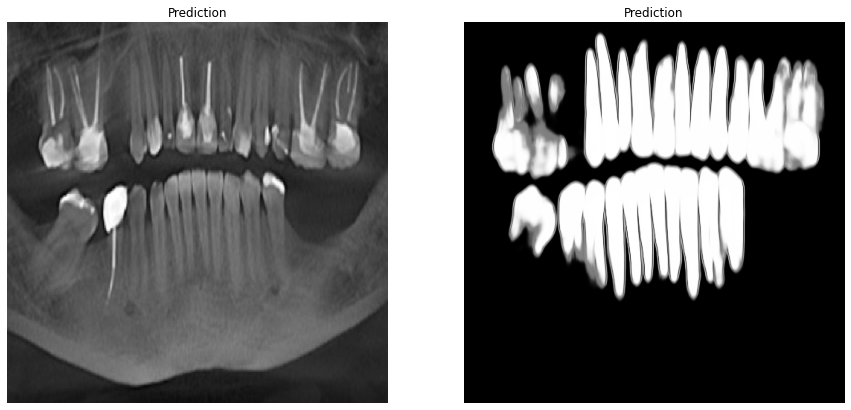

task-17.png


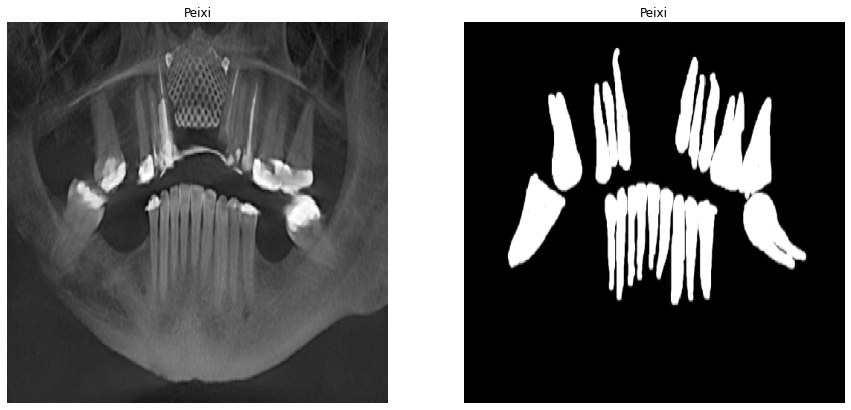

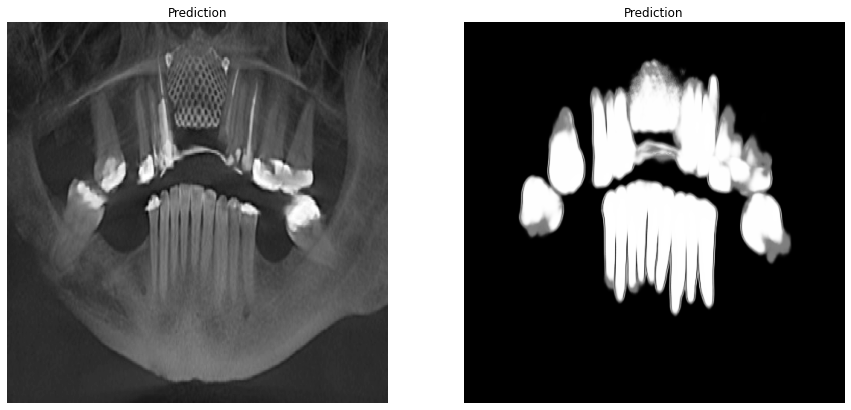

IoU = 0.51255863904953
Dice Score = 0.46870638459228225


In [40]:
images = ["task-{}.png".format(x) for x in range(13,18)]
def dice(im1, im2):
    im1 = np.asarray(im1).astype(bool)
    im2 = np.asarray(im2).astype(bool)

    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    # Compute Dice coefficient
    intersection = np.logical_and(im1, im2)
    return 2. * intersection.sum() / (im1.sum() + im2.sum())

m_running = tf.keras.metrics.MeanIoU(num_classes=2)
truths=[]
predictions=[]
for image_path in images:
    img = tf.keras.preprocessing.image.img_to_array(tf.keras.utils.load_img(
        './data/peixi/Images/{}'.format(image_path),
        grayscale=True,
        color_mode='rgb',
        target_size=(512,512,1),
        interpolation='nearest'
    ))
    truth = tf.keras.preprocessing.image.img_to_array(tf.keras.utils.load_img(
        './data/peixi/Tooth/{}'.format(image_path),
        grayscale=True,
        color_mode='rgb',
        target_size=(512,512,1),
        interpolation='nearest'
    ))
    truth=truth/np.max(truth)
    #print(img.shape)
    print(image_path)
    prediction = model.predict(np.array([clahe.apply(img.astype(np.uint8))]), batch_size=1)
    display_mask_image([img,truth],mytitle="Peixi")
    display_mask_image([img,prediction[0]],mytitle="Prediction")
    truths.append(truth)
    predictions.append(prediction[0])
m_running.update_state(truths,predictions)
print("IoU = {}".format(m_running.result().numpy()))
print("Dice Score = {}".format(np.mean([dice(truth,prediction) for truth,prediction in zip(truths,predictions)])))

# Lets view results after training

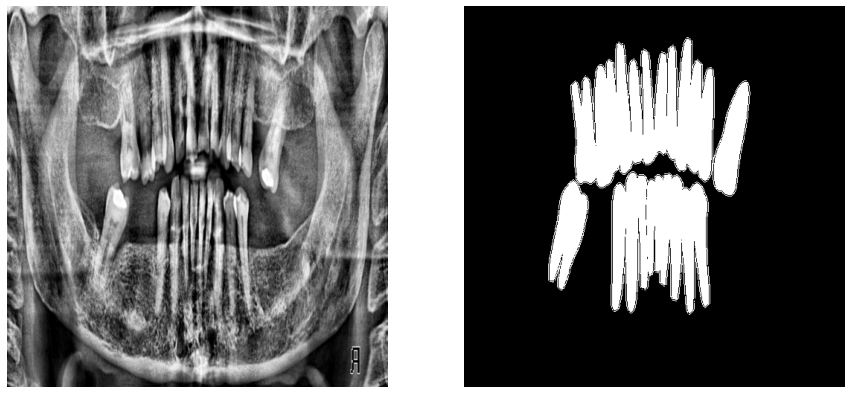

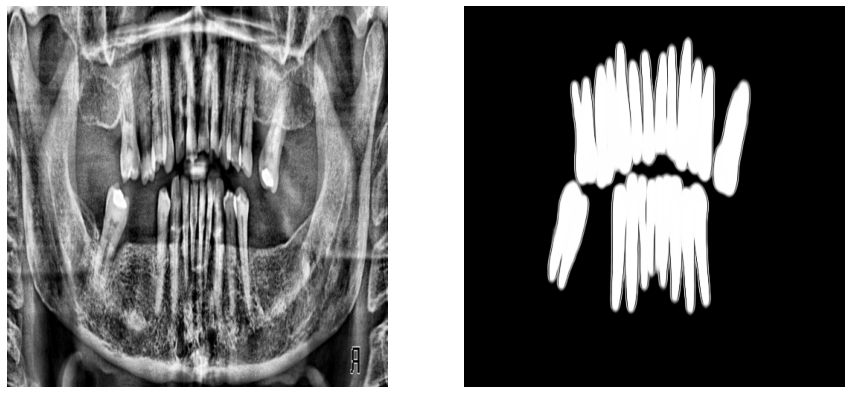

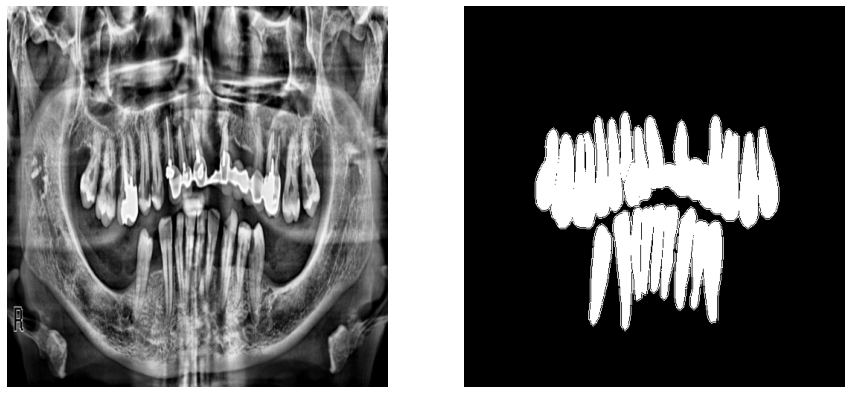

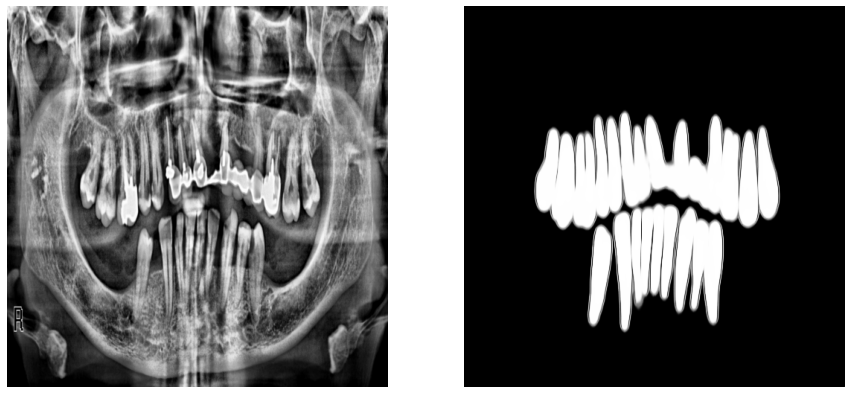

In [38]:
#TRAINING
for element in dataset[-1].take(1): #take a batch
    predictions = model.predict(element[0])
    for b in range(min(2,BATCH_SIZE)): #now have a tuple
        display_mask_image([element[0][b],element[1][b]])
        display_mask_image([element[0][b],predictions[b]])

In [39]:
model.evaluate(dataset[-1])

2022-04-13 20:11:21.574815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 6s 2s/step - loss: 0.0432 - accuracy: 0.9786


[0.04324575141072273, 0.9786320924758911]

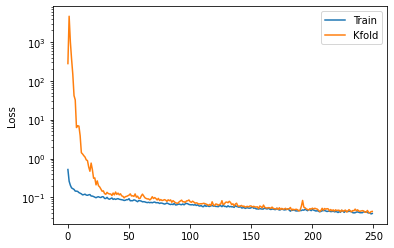

In [27]:
plt.semilogy(history["loss"],label="Train")
plt.semilogy(history["val_loss"],label="Kfold")
plt.ylabel("Loss")
plt.legend()

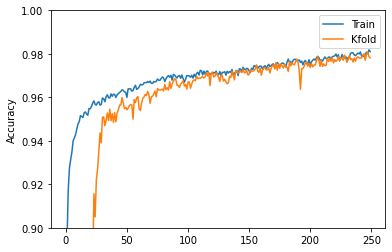

In [29]:
plt.plot(history["accuracy"],label="Train")
plt.plot(history["val_accuracy"],label="Kfold")
plt.ylabel("Accuracy")
plt.ylim([0.9,1])
plt.legend()